# Clustering Survey Data

In this project, anonymous survey data from a credit union in Washington is used to create clusters via K-Means. See the apendix below for a full description of the dataset. 

Clustering in this instance is useful because this model will find structures in the data set so that similar samples can be grouped together. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from matplotlib import pyplot

## Demographic Clustering

In this section, perform a cluster analysis using the fields unrelated to the values survey:

* age
* gender
* engagement
* account.age

In [2]:
df = pd.read_csv("washington_survey_data.txt",sep="\t")

In [3]:
df.head()

,id,age,gender,engagement,mem.edu,zip,channel,progressivism,harm,fair,...,account.age,region,public.sector,sustainability,localism,pub.greater.priv,experience.more.important,teachers.underpaid,main.focal.value,support.of.focal.value
0,346,56,other,Engaged,2,98503.0,Branch,-0.083333,1.00,1.00,...,9.951,Thurston,yes,2.333333,2.75,3,3,2,Homelessness,0.000000
1,348,66,female,Highly Engaged,3,98012.0,Branch,2.291667,5.00,4.75,...,8.838,W WA Metro,yes,6.000000,5.75,1,4,5,Environment,18.627830
2,349,71,male,Not Engaged,7,98506.0,Branch,1.000000,3.25,4.25,...,5.356,Thurston,yes,5.166667,4.50,4,3,6,Hunger/Poverty,28.739986
3,352,66,male,Engaged,7,NaN,Branch,0.583333,4.25,4.75,...,9.192,W WA Metro,no,5.500000,4.50,3,3,4,Education,18.055372
4,358,50,male,Highly Engaged,4,98233.0,Branch,-0.500000,2.00,4.50,...,11.570,W WA Non Metro,yes,2.833333,4.00,2,4,5,Education,4.400921


In [4]:
k_df = df[["age", "gender", "engagement", "account.age", 'region']]

In [5]:
k_df.head()

,age,gender,engagement,account.age,region
0,56,other,Engaged,9.951,Thurston
1,66,female,Highly Engaged,8.838,W WA Metro
2,71,male,Not Engaged,5.356,Thurston
3,66,male,Engaged,9.192,W WA Metro
4,50,male,Highly Engaged,11.570,W WA Non Metro


## Encode Variables
Here we encode the variables and then look at the descriptive statistics. 


/Users/meganalbee/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

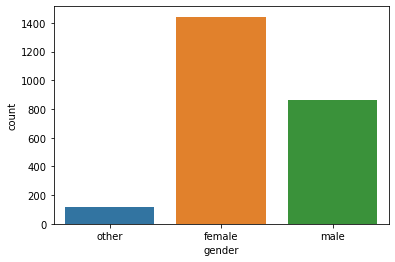

In [6]:
#Looking at the distribution
sns.countplot(k_df['gender'])

/Users/meganalbee/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='engagement', ylabel='count'>

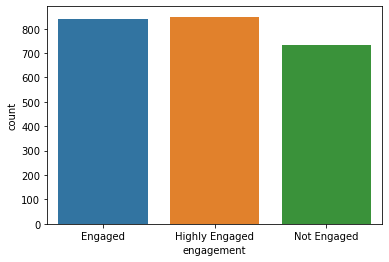

In [7]:
#Looking at the distribution
sns.countplot(k_df['engagement'])

In [8]:
#Recode Gender Categories
gender = {'male':0, 'female':1, 'other':2}
k_df['gender']= k_df['gender'].map(gender)
k_df.head()

/var/folders/np/jf6g_y1x1936njwpvh79lbmc0000gn/T/ipykernel_4216/1314716308.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_df['gender']= k_df['gender'].map(gender)


,age,gender,engagement,account.age,region
0,56,2,Engaged,9.951,Thurston
1,66,1,Highly Engaged,8.838,W WA Metro
2,71,0,Not Engaged,5.356,Thurston
3,66,0,Engaged,9.192,W WA Metro
4,50,0,Highly Engaged,11.570,W WA Non Metro


In [9]:
#Recode Engagement Categories
engagement = {'Not Engaged':0, 'Engaged':1, 'Highly Engaged':2}
k_df['engagement']= k_df['engagement'].map(engagement)
k_df.head()

/var/folders/np/jf6g_y1x1936njwpvh79lbmc0000gn/T/ipykernel_4216/1752956.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_df['engagement']= k_df['engagement'].map(engagement)


,age,gender,engagement,account.age,region
0,56,2,1,9.951,Thurston
1,66,1,2,8.838,W WA Metro
2,71,0,0,5.356,Thurston
3,66,0,1,9.192,W WA Metro
4,50,0,2,11.570,W WA Non Metro


In [10]:
region = {'Thurston':0, 'W WA Metro':1, 'W WA Non Metro':2, 'E WA Non Metro':3, 'E WA Metro':4}
k_df['region']= k_df['region'].map(region)
k_df.head()

/var/folders/np/jf6g_y1x1936njwpvh79lbmc0000gn/T/ipykernel_4216/1454015603.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_df['region']= k_df['region'].map(region)


,age,gender,engagement,account.age,region
0,56,2,1,9.951,0
1,66,1,2,8.838,1
2,71,0,0,5.356,0
3,66,0,1,9.192,1
4,50,0,2,11.570,2


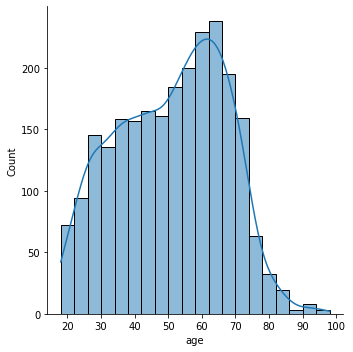

In [11]:
#looking at the age distribution 
sns.displot(k_df['age'], bins=20, kde=True)

## Scale the Data

In [12]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(k_df[['age', 'gender', 'engagement', 'account.age', 'region']])
print(scaled_data)

[[ 0.33169655  2.34979997 -0.05937746 -0.32762493 -1.05459074]
 [ 0.95218593  0.55237004  1.17987104 -0.42165049 -0.24277383]
 [ 1.26243062 -1.24505989 -1.29862596 -0.71580773 -1.05459074]
 ...
 [-0.35084176  0.55237004 -1.29862596  0.58382322  2.1926769 ]
 [-1.09542901 -1.24505989 -0.05937746 -0.86854647 -1.05459074]
 [-1.46772264  0.55237004 -1.29862596 -1.15070764 -1.05459074]]


## Build Model

In [25]:
x = k_df.copy()
kmeans = KMeans(8)
kmeans.fit(x)
clusters = x.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)


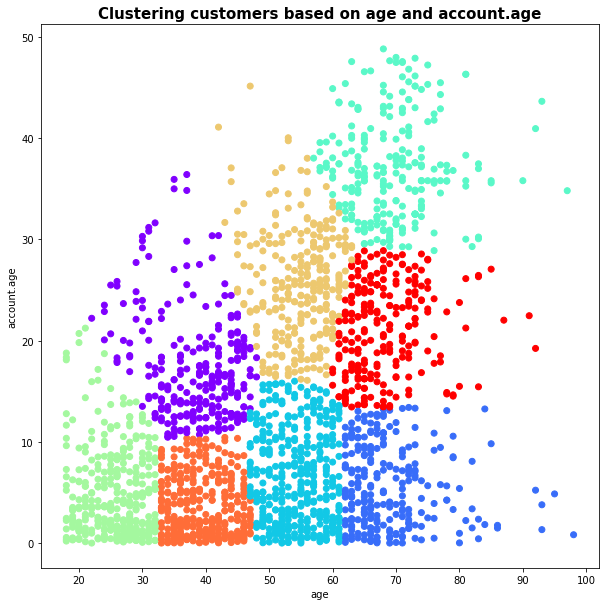

In [26]:
plt.figure(figsize=(10,10))
plt.scatter(clusters['age'],clusters['account.age'],c=clusters['cluster_pred'],cmap='rainbow')
plt.title("Clustering customers based on age and account.age", fontsize=15,fontweight="bold")
plt.xlabel("age")
plt.ylabel("account.age")
plt.show()


## Deciding on Clusters

The goal of K-Means clustering is to reduce the intracluster distance by grouping similar points together and minimizing the distance between the data points and the centroid of the cluster.

<b>Inertia</b> is a measure of how close the objects in a cluster are to one another. It is calculated by taking the Euclidean distance between each data point and its centroid, squaring the distance, and then summing the squares for all points in a cluster. The smaller the inertia value, the more cohesive the cluster, as the points will be closer to one another.

Text(0, 0.5, 'Inertia')

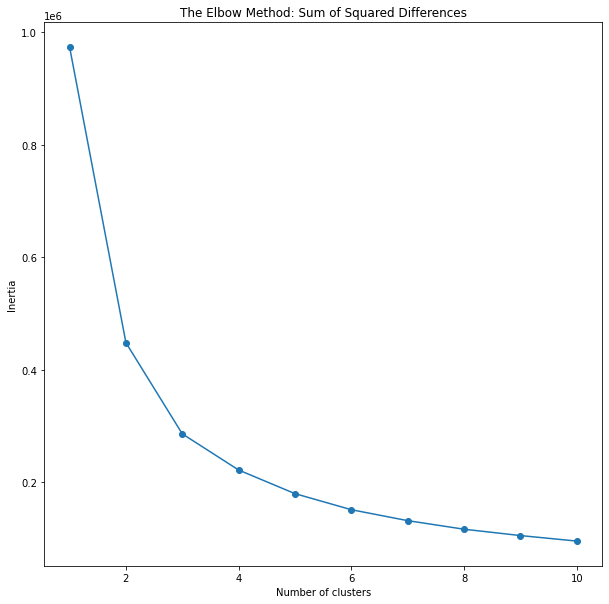

In [27]:
#SSE is the sum of squared differences 
SSE = []
for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(x)
    SSE.append(kmeans.inertia_)
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,11), 'SSE':SSE})
plt.figure(figsize=(10, 10))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.title('The Elbow Method: Sum of Squared Differences')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

The elbow graph is used to visualize the results of the algorithm, which can help identify the best number of clusters for the dataset. 

The <b>K-Means++</b>is an algorithm used to determine the optimal number of clusters for a given data set. It is a variation of the k-means algorithm, which is used to cluster data points in a data set based on their similarity. In an elbow graph, k-means++ can be used to find the “elbow” or the point at which the sum of squared error (SSE) begins to decrease more slowly. This elbow point can be used to determine the optimal number of clusters for the data set.

## Silhouette Coefficient
The Silhouette Coefficient is a metric used to measure how distinct clusters are from each other. It evaluates how well-defined clusters are, and how well-separated they are from each other. 

A high Silhouette Coefficient score indicates that the clusters have distinct features that other clusters do not have, and that the clusters are well-separated from each other. 

A score of -1 indicates that the clusters are not distinct from each other, and a score of 1 indicates that the clusters are well-separated and have distinct features from each other.

This tells us the accuracy for our clustering technique. 

In [28]:
print(silhouette_score(clusters, kmeans.labels_, metric='euclidean'))

0.3564121551513956


This means that the silhouette score for the model is 0.35 which is sufficient.

## Assigning Optimal Number of Clusters

In [30]:
kmeans_new = KMeans(8)
#Fit the data
kmeans_new.fit(x)
#Create a new data frame with the predicted clusters
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x)


In [31]:
#recode
gender = {0 :'male', 1 :'female', 2 : 'other'}
clusters_new['gender']= clusters_new['gender'].map(gender)


#recode
engagement = {0 :'Not Engaged', 1:'Engaged', 2 :'Highly Engaged'}
clusters_new['engagement']= clusters_new['engagement'].map(engagement)


region = {0:'Thurston', 1 : 'W WA Metro', 2 : 'W WA Non Metro', 3 : 'E WA Non Metro', 4 : 'E WA Metro'}
clusters_new['region']= clusters_new['region'].map(region)

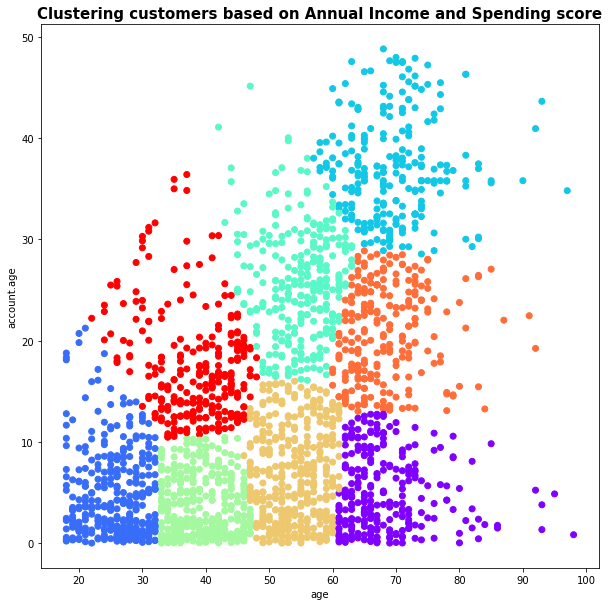

In [32]:
plt.figure(figsize=(10,10))
plt.scatter(clusters_new['age'],clusters_new['account.age'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.title("Clustering customers based on Annual Income and Spending score", fontsize=15,fontweight="bold")
plt.xlabel("age")
plt.ylabel("account.age")
plt.show()

## Cluster Descriptives 
It is helpful to see graphs to visualize the clusters' unique features. 

In [34]:
avg_data = clusters_new.groupby(['cluster_pred'], as_index=False).mean()
print(avg_data)


   cluster_pred        age  account.age
0             0  68.386973     5.131609
1             1  25.681440     4.794366
2             2  69.461847    36.926847
3             3  54.927083    25.553226
4             4  39.439169     3.747985
5             5  53.833333     6.746438
6             6  68.290323    20.649331
7             7  38.294545    17.309102


<AxesSubplot:xlabel='cluster_pred', ylabel='age'>

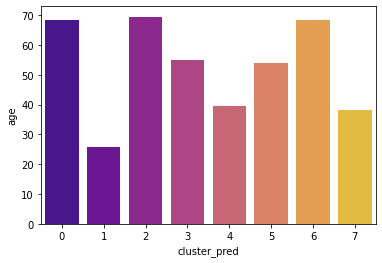

In [35]:
sns.barplot(x='cluster_pred',y='age',palette="plasma",data=avg_data)


<AxesSubplot:xlabel='cluster_pred', ylabel='account.age'>

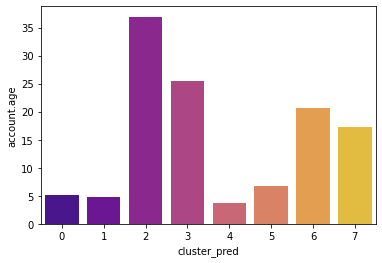

In [36]:
sns.barplot(x='cluster_pred',y='account.age',palette="plasma",data=avg_data)

In [37]:
data2 = pd.DataFrame(clusters_new.groupby(['cluster_pred','gender'])['gender'].count())

In [45]:
data2.head()

gender
cluster_pred gender        
0            female     150
             male       104
             other        7
1            female     234
             male       103

In [39]:
data3 = pd.DataFrame(clusters_new.groupby(['cluster_pred','engagement'])['engagement'].count())

In [44]:
data3.head()

engagement
cluster_pred engagement                
0            Engaged                 78
             Highly Engaged          66
             Not Engaged            117
1            Engaged                156
             Highly Engaged          74

In [43]:
data4 = pd.DataFrame(clusters_new.groupby(['cluster_pred','region'])['region'].count())
data4.head()

region
cluster_pred region                
0            E WA Metro          18
             E WA Non Metro      30
             Thurston            77
             W WA Metro          96
             W WA Non Metro      40

## Write out Results
This for loop helps us see descriptives for our data set. It is a lot of text so we will not print to the screen.

In [47]:
clustering = kmeans_new.fit_predict(scaled_data)
df['cluster'] = clustering

In [ ]:
for cluster in set(clustering) :
    print(f'Printing Results for Cluster {cluster}.\n\n')
    
    print(df.query(f"cluster == {cluster}"))
    
    print("\n\n")
    

# Part Two: Clustering Values 

Similarly to the previous section, we will use a cluster analysis, but this time on the values questions:

* fair
* harm
* in.group
* authority
* purity
* public.sector
* sustainability
* localism

We will report the following in the appendix: 

* Predominant region
* Average age and account age
* Most common focal value
* Mean results on the questions of `pub.greater.priv`, `experience.more.important`, and `teachers.underpaid`. 

In [53]:
value_df = pd.read_csv("washington_survey_data.txt",sep="\t")

In [54]:
pd.set_option('display.max_columns', 500)

In [55]:
v_df = df[["fair", "harm", "in.group", "authority", 'purity', 'public.sector', 'sustainability', 'localism']]
v_df.head()

,fair,harm,in.group,authority,purity,public.sector,sustainability,localism
0,1.00,1.00,1.00,1.00,1.25,yes,2.333333,2.75
1,4.75,5.00,2.25,3.25,2.25,yes,6.000000,5.75
2,4.25,3.25,2.25,3.25,2.75,yes,5.166667,4.50
3,4.75,4.25,4.75,3.25,3.75,no,5.500000,4.50
4,4.50,2.00,3.50,4.50,3.25,yes,2.833333,4.00


In [56]:
public_sector = {'no':0, 'yes':1}
v_df['public.sector']= v_df['public.sector'].map(public_sector)
v_df.head()

/var/folders/np/jf6g_y1x1936njwpvh79lbmc0000gn/T/ipykernel_4216/3469891318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v_df['public.sector']= v_df['public.sector'].map(public_sector)


,fair,harm,in.group,authority,purity,public.sector,sustainability,localism
0,1.00,1.00,1.00,1.00,1.25,1,2.333333,2.75
1,4.75,5.00,2.25,3.25,2.25,1,6.000000,5.75
2,4.25,3.25,2.25,3.25,2.75,1,5.166667,4.50
3,4.75,4.25,4.75,3.25,3.75,0,5.500000,4.50
4,4.50,2.00,3.50,4.50,3.25,1,2.833333,4.00


## Correlations

<AxesSubplot:>

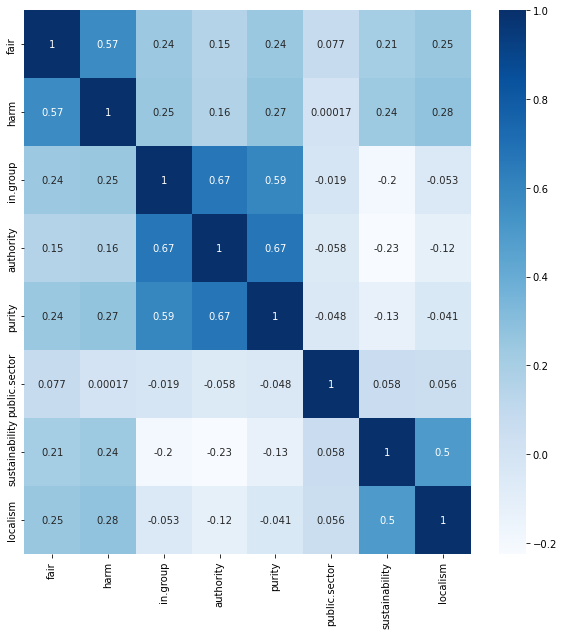

In [57]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(v_df.corr(), annot=True, cmap='Blues')

## Scaling the Data

In [58]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(v_df[["fair", "harm", "in.group", "authority", 'purity', 'sustainability', 'localism']])
print(scaled_data)



[[-3.86726106 -3.78490005 -2.16559879 ... -1.38079968 -1.95132399
  -2.30119766]
 [ 1.16876237  1.40031262 -0.88920511 ... -0.52725288  1.63573401
   1.20123289]
 [ 0.49729258 -0.86821792 -0.88920511 ... -0.10047949  0.82049355
  -0.25811317]
 ...
 [-0.17417721  0.10400945 -0.37864764 ... -0.52725288  0.16830119
   0.90936368]
 [ 1.16876237  1.40031262  1.91886098 ...  1.8200008   0.82049355
   1.49310211]
 [ 0.16155768  0.10400945  0.13190983 ... -0.95402628  1.14658974
   0.61749447]]


In [60]:
x = v_df.copy()
kmeans = KMeans(8)
kmeans.fit(x)
clusters = x.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)

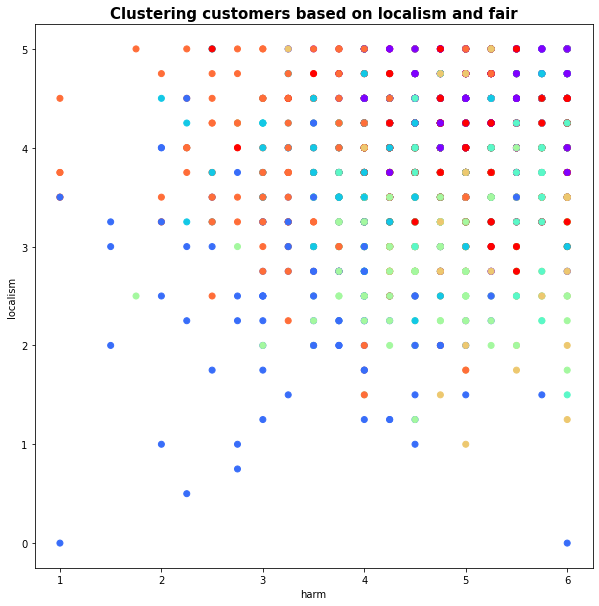

In [61]:
plt.figure(figsize=(10,10))
plt.scatter(clusters['localism'],clusters['fair'],c=clusters['cluster_pred'],cmap='rainbow')
plt.title("Clustering customers based on localism and fair", fontsize=15,fontweight="bold")
plt.xlabel("harm")
plt.ylabel("localism")
plt.show()

## Checking Model Fit 
This is just for practice. We already set the clusters on the same dataset above, but it's good to see what fits the model best. 

Text(0, 0.5, 'Inertia')

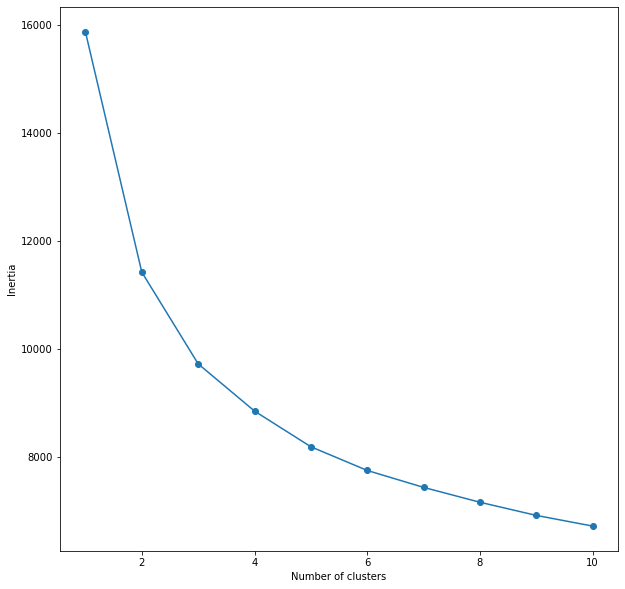

In [63]:
SSE = []
for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(x)
    SSE.append(kmeans.inertia_)
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,11), 'SSE':SSE})
plt.figure(figsize=(10, 10))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [66]:
print(silhouette_score(clusters, kmeans.labels_, metric='euclidean'))

0.1691877146087809


This output tells us that there will be overlapping between our clusters. In the future, I would adjust my clusters in this instance to see what would make the best fit.

In [67]:
kmeans_new = KMeans(8)
#Fit the data
kmeans_new.fit(x)
#Create a new data frame with the predicted clusters
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x)


In [68]:
#recode
public_sector = {0 :'no', 1: 'yes'}
clusters_new['public.sector']= clusters_new['public.sector'].map(public_sector)


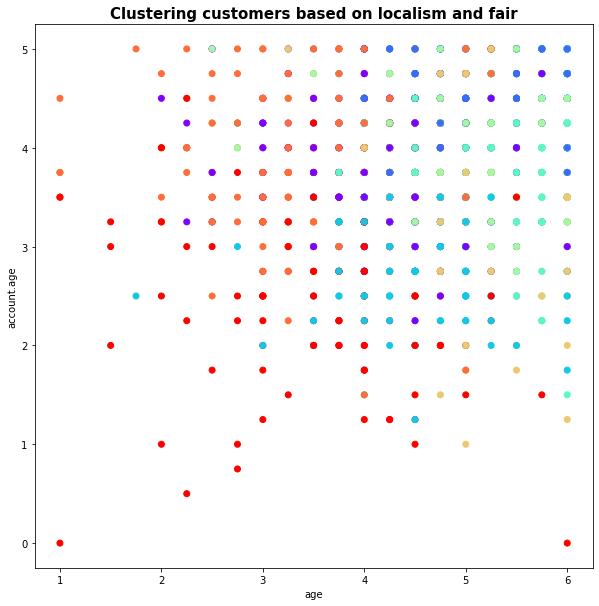

In [69]:
plt.figure(figsize=(10,10))
plt.scatter(clusters_new['localism'],clusters_new['fair'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.title("Clustering customers based on localism and fair", fontsize=15,fontweight="bold")
plt.xlabel("age")
plt.ylabel("account.age")
plt.show()

In [77]:
clustering = kmeans_new.fit_predict(x)


In [78]:
value_df['cluster'] = clustering

In [ ]:
cluster_dict = {}

for cluster in set(clustering) : 
    print(f'Printing Results for Cluster {cluster}.\n\n')
    clusterinfo = value_df.query(f'cluster == {cluster}')
    cluster_dict[cluster] = clusterinfo
    print(cluster_dict)
    print("\n\n")
                             

## Breaking down Clustering Features for Description

In [90]:
overall_data = value_df.groupby(['cluster'], as_index=False)
overall_data.head()

,id,age,gender,engagement,mem.edu,zip,channel,progressivism,harm,fair,in.group,authority,purity,account.age,region,public.sector,sustainability,localism,pub.greater.priv,experience.more.important,teachers.underpaid,main.focal.value,support.of.focal.value,cluster
0,346,56,other,Engaged,2,98503.0,Branch,-0.083333,1.00,1.00,1.00,1.00,1.25,9.951,Thurston,yes,2.333333,2.75,3,3,2,Homelessness,0.000000,2
1,348,66,female,Highly Engaged,3,98012.0,Branch,2.291667,5.00,4.75,2.25,3.25,2.25,8.838,W WA Metro,yes,6.000000,5.75,1,4,5,Environment,18.627830,3
2,349,71,male,Not Engaged,7,98506.0,Branch,1.000000,3.25,4.25,2.25,3.25,2.75,5.356,Thurston,yes,5.166667,4.50,4,3,6,Hunger/Poverty,28.739986,0
3,352,66,male,Engaged,7,NaN,Branch,0.583333,4.25,4.75,4.75,3.25,3.75,9.192,W WA Metro,no,5.500000,4.50,3,3,4,Education,18.055372,7
4,358,50,male,Highly Engaged,4,98233.0,Branch,-0.500000,2.00,4.50,3.50,4.50,3.25,11.570,W WA Non Metro,yes,2.833333,4.00,2,4,5,Education,4.400921,4
5,361,40,female,Engaged,3,98520.0,Branch,0.541667,3.75,4.00,3.75,3.00,3.25,5.932,W WA Non Metro,yes,3.500000,5.25,3,5,6,Homelessness,28.680137,1
6,367,49,male,Engaged,4,NaN,Branch,1.791667,4.25,4.50,3.50,2.50,1.75,23.611,W WA Metro,yes,5.833333,5.50,5,2,5,Human/Civil rights,58.088161,3
7,368,43,male,Not Engaged,6,99163.0,Branch,2.500000,4.75,4.25,2.50,2.25,1.25,5.033,E WA Non Metro,yes,3.333333,4.75,4,3,6,Environment,9.126386,5
8,369,61,male,Highly Engaged,3,98133.0,Branch,0.500000,4.25,4.25,3.75,3.75,3.75,25.951,W WA Metro,yes,2.500000,2.75,4,5,6,Human/Civil rights,4.400921,4
9,371,71,female,Highly Engaged,6,NaN,Branch,3.166667,4.75,4.25,1.50,1.50,1.00,20.367,W WA Metro,yes,5.333333,6.00,1,3,4,Environment,82.125688,6


In [96]:
avg_data = value_df.groupby(['cluster'], as_index=False).mean()
avg_data.head()


,cluster,id,age,mem.edu,zip,progressivism,harm,fair,in.group,authority,purity,account.age,sustainability,localism,pub.greater.priv,experience.more.important,teachers.underpaid,support.of.focal.value
0,0,5696.900685,45.808219,4.205479,98529.818868,0.212471,3.236301,3.142979,2.890411,3.107877,2.933219,13.318031,4.194064,4.452055,3.116438,4.065068,4.773973,17.706269
1,1,6509.536364,54.536364,4.354545,98509.972431,0.794318,4.240341,4.117614,3.369318,3.261364,3.523295,14.976855,4.839394,4.929545,3.272727,4.009091,5.065909,23.961324
2,2,6081.571429,42.827068,4.112782,98599.310924,0.467105,2.509398,2.646617,2.268797,2.225564,1.838346,11.966368,3.234336,3.644737,2.849624,3.864662,4.045113,11.205399
3,3,6072.480769,52.318681,4.989011,98419.658385,1.787431,4.174451,4.162775,2.618819,2.276786,2.247940,14.781783,5.258700,5.421703,3.414835,3.898352,5.472527,28.351058
4,4,6530.923323,52.926518,3.683706,98619.496429,0.012913,3.869808,3.899361,3.873802,3.822684,3.918530,14.247415,2.955272,3.978435,2.757188,4.137380,4.201278,18.823000


## Categorical Data Modes

In [82]:
clust0_reg = cluster_dict[0].region
clust1_reg = cluster_dict[1].region
clust2_reg = cluster_dict[2].region
clust3_reg = cluster_dict[3].region
clust4_reg = cluster_dict[4].region
clust5_reg = cluster_dict[5].region
clust6_reg = cluster_dict[6].region
clust7_reg = cluster_dict[7].region

In [91]:
clust7_reg.mode()

0    W WA Metro
Name: region, dtype: object

In [85]:
clust0_foc = cluster_dict[0]['main.focal.value']
clust1_foc = cluster_dict[1]['main.focal.value']
clust2_foc = cluster_dict[2]['main.focal.value']
clust3_foc = cluster_dict[3]['main.focal.value']
clust4_foc = cluster_dict[4]['main.focal.value']
clust5_foc = cluster_dict[5]['main.focal.value']
clust6_foc = cluster_dict[6]['main.focal.value']
clust7_foc = cluster_dict[7]['main.focal.value']

In [94]:
clust7_foc.mode()

0    Health (i.e. cancer research)
Name: main.focal.value, dtype: object

# Results: 
<b>Cluster 0</b>
* Predominant region : W WA Metro
* Average age and account age: 53 & 14, respectively
* Most common focal value: Health
* Mean results on the questions of 


| pub.greater.priv      | experience.more.important  | teachers.underpaid  |
| :-------------------- | :------------------------: |-------------------: |
| 2.76                  | 4.12                       |       4.18         |

<b>Cluster 1</b>
* Predominant region: W WA Metro
* Average age and account age: 52 & 15, respectively
* Most common focal value: Environment
* Mean results on the questions of pub.greater.priv, experience.more.important, and teachers.underpaid.

| pub.greater.priv      | experience.more.important  | teachers.underpaid  |
| :-------------------- | :------------------------: |-------------------: |
| 2.76                  | 4.12                      |       5.48         |

<b>Cluster 2</b>
* Predominant region: W WA Metro
* Average age and account age: 54 & 15, respectively
* Most common focal value: Education
* Mean results on the questions of pub.greater.priv, experience.more.important, and teachers.underpaid:

| pub.greater.priv      | experience.more.important  | teachers.underpaid  |
| :-------------------- | :------------------------: |-------------------: |
| 3.26                  | 4.01                      |       5.07         |


<b>Cluster 3</b>
* Predominant region: W WA Metro
* Average age and account age: 43 & 12, respectively
* Most common focal value: Health
* Mean results on the questions of pub.greater.priv, experience.more.important, and teachers.underpaid.

| pub.greater.priv      | experience.more.important  | teachers.underpaid  |
| :-------------------- | :------------------------: |-------------------: |
| 2.85                  | 3.83                      |       4.05         |

<b>Cluster 4</b>
* Predominant region: W WA Metro
* Average age and account age: 55 & 13, respectively
* Most common focal value: Health
* Mean results on the questions of pub.greater.priv, experience.more.important, and teachers.underpaid.

| pub.greater.priv      | experience.more.important  | teachers.underpaid  |
| :-------------------- | :------------------------: |-------------------: |
| 3.29                  | 4.16                      |       4.88         |

<b>Cluster 5 </b>
* Predominant region: W WA Metro
* Average age and account age: 49 & 12, respectively
* Most common focal value: Education
* Mean results on the questions of pub.greater.priv, experience.more.important, and teachers.underpaid.

| pub.greater.priv      | experience.more.important  | teachers.underpaid  |
| :-------------------- | :------------------------: |-------------------: |
| 3.15.                 | 3.97                      |       4.77         |

<b>Cluster 6</b>
* Predominant region: W WA Metro
* Average age and account age: 48 & 13, respectively
* Most common focal value: Education
* Mean results on the questions of pub.greater.priv, experience.more.important, and teachers.underpaid.

| pub.greater.priv      | experience.more.important  | teachers.underpaid  |
| :-------------------- | :------------------------: |-------------------: |
| 3.13                  | 4.05                      |       4.81         |

<b>Cluster 7</b>
* Predominant region: W WA Metro
* Average age and account age: 45 & 13, respectively
* Most common focal value: Health
* Mean results on the questions of pub.greater.priv, experience.more.important, and teachers.underpaid.

| pub.greater.priv      | experience.more.important  | teachers.underpaid  |
| :-------------------- | :------------------------: |-------------------: |
| 3.34                 | 3.88                      |       5.24         |

##  Appendix: Full Data Description
A financial institution in Washington has become concerned that their current membership 
base is not well-aligned with their corporate values. Through that concern they 
realized that don't actually understand their membership's values very well. They 
surveyed 2,421 members to shed light on the issue. 

The heart of the survey was the Moral Foundations Theory of Jonathan Haidt. Members 
were surveyed on the Moral Foundations Questionnaire, which you should take so you 
understand the test. Survey respondents were scored on the five foundations as well 
as a single-number summary, Progressivism. 

The financial institution values Localism, Sustainability, and Education. These aspects 
of member's values were assessed in the survey as well. Localism and Sustainability used
validated scales and thus can be summarized via a single score, where higher values indicate
greater support for the values. Education is summarized by the following three questions, 
which we do not have evidence can be combined into a single score:

* In general, public schools provide a better education than private schools.
* Public school teachers are underpaid.
* Experience is more important than education in determining success in life.
These questions were evaluated on a 1 to 6 scale where 1 indicated "Strongly Disagree" and 
6 indicated "Strongly Agree". 

Finally, we have information on the member that can be used to understand variation 
in their values. 

The data consists of the following columns:

* ID: a unique identifier for the survey respondent.
* age: the age of the respondent.
* gender: gender was evaluated with robust scale and collapsed into male/female/other for 
  those whose gender identity was not male or female.
* engagement: three categories of engagement with the financial institution.
* mem.edu: the self-reported education level of the member with the following scale:
* zip: the member zip code. 
* channel: how the member joined the financial institution. Options are "Loan" if they joined 
  via an auto loan, "Branch" if they joined at a branch and other for online or unknown. 
* progressivism/harm/fair/in.group/authority/purity: The MFQ results.
* account.age: the age of the member's account, in years. 
* region: The region of Washington the member lives in. May be easier to work with than zip.
* public.sector: has the person ever been a public employee?
* sustainability/localism: Scores on the validated scales. Higher values indicate greater
  support for the value.
* pub.greater.priv/experience.more.important/teachers.underpaid: The responses to the 
  education questions above. 
* main.focal.value: Respondents were asked, "Below is a list of broad areas to which people 
  often dedicate their volunteer or philanthropic efforts. From this list, please select the 
  most important to you. If an area of particular importance is missing, please let us know 
  about it in the space for 'other.'" This column holds the respondents' answer to that question.
* support.of.focal.value: Respondents were given an opportunity to indicate how they 
  supported their focal value. Those responses were collapsed into a single score, where 
  a higher value indicates more support.
